# "Уравнение Бюргерса. Изучение поведения различных схем"

## Метод Куранта-Изаксона-Риса

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + \frac{(u_{i+1}^n)^2-(u_{i-1}^n)^2}{4 \Delta x} = \frac{|u^n_{i+1/2}|(u^n_{i+1}-u^n_i)-|u^n_{i-1/2}|(u_n^i-u_{i-1}^n)}{2\Delta x}+\nu \frac{u_{i+1}^n-2u_i^n + u_{i-1}^n}{(\Delta x)^2},$$
	$$ u_{i+1/2}^n= \frac{u_i^n+u_{i+1}^n}{2}$$

In [22]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
A = -1; B = 1; T = 0.5   # границы
h = 0.05; tau = 0.05     # размеры шага по времени и координате
M = int ((B-A)/h)# количество узлов по координате
N = int(T / tau)              # количество узлов по времени
X = np.linspace(A, B, M+1)
x = np.linspace(A, B, M+1)

In [141]:
nu = 1

In [153]:
X

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ])

In [154]:
def Gauss(x, mu, sigma):
    return 1/(sigma*(2*math.pi)**(1/2))*math.exp((-(x-mu)**2)/(2*sigma**2))

In [155]:
mu = 0
sigma = 0.2

In [156]:
for i in range(M+1):
    X[i] = Gauss(X[i], mu, sigma)

In [157]:
X

array([  1.86332659e-05,   6.30355259e-05,   2.00326487e-04,
         5.98064418e-04,   1.67731314e-03,   4.41913153e-03,
         1.09374556e-02,   2.54303462e-02,   5.55449827e-02,
         1.13970904e-01,   2.19684668e-01,   3.97797544e-01,
         6.76676416e-01,   1.08132583e+00,   1.62326234e+00,
         2.28916681e+00,   3.03265330e+00,   3.77419801e+00,
         4.41248451e+00,   4.84616617e+00,   5.00000000e+00,
         4.84616617e+00,   4.41248451e+00,   3.77419801e+00,
         3.03265330e+00,   2.28916681e+00,   1.62326234e+00,
         1.08132583e+00,   6.76676416e-01,   3.97797544e-01,
         2.19684668e-01,   1.13970904e-01,   5.55449827e-02,
         2.54303462e-02,   1.09374556e-02,   4.41913153e-03,
         1.67731314e-03,   5.98064418e-04,   2.00326487e-04,
         6.30355259e-05,   1.86332659e-05])

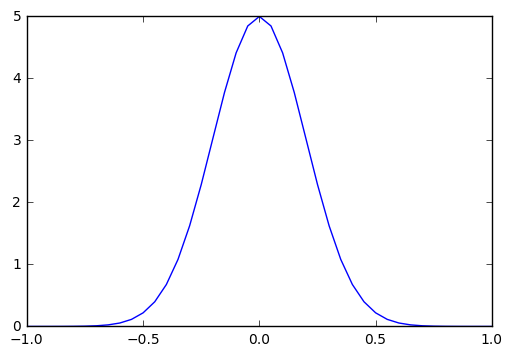

In [158]:
plt.plot(x,X)

In [159]:
u = np.ones((2,M+1))

In [160]:
for i in range(M+1):
    u[0][i] = X[i]

In [161]:
u[0][0] = u[0][M] = u[1][0] = u[1][M] = 0

In [162]:
for i in range(N):
    d1 = (u[i % 2][0] + u[i % 2][1]) / 2
    for j in range(M-2):
        d2 = (u[i % 2][j + 1] + u[i % 2][j + 2]) / 2
        u[1 - (i % 2)][j + 1] = u[i % 2][j + 1] + tau * (((u[i % 2][j]) ** 2 - (u[i % 2][j + 2]) ** 2) / (4 * h) + (abs(d2)*(u[i % 2][j + 2] - u[i % 2][j + 1]) - abs(d1)*(u[i % 2][j + 1] - u[i % 2][j])) / (2 * h) + nu * (u[i % 2][j + 2] - 2 * u[i % 2][j + 1] + u[i % 2][j])/(h ** 2))
        d1 = d2

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in double_scalars
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in double_scalars


In [163]:
u

array([[  0.00000000e+000,  -2.15536350e+113,  -1.52942424e+132,
          2.08384234e+131,  -9.83715858e+067,   1.32104001e+132,
         -4.44600272e+131,  -5.22008614e+187,  -1.02468362e+221,
          8.77298528e+220,  -1.57498478e+112,  -3.25803047e+264,
         -1.44637529e+287,   1.44637529e+287,  -3.26555469e+289,
          4.87567008e+146,  -8.70953609e+296,   8.70953642e+296,
         -1.39319149e+295,   1.14616184e+150,  -7.93419499e+298,
          7.93558818e+298,  -5.14339768e+298,   1.48701691e+283,
         -2.07130505e+299,   2.58564482e+299,  -2.90053941e+264,
          7.58079825e+268,  -2.85067772e+269,   4.62665702e+136,
         -6.85187058e+268,              -inf,               nan,
                      nan,               nan,               nan,
                      inf,               nan,   9.51699809e+176,
          6.30355259e-005,   0.00000000e+000],
       [  0.00000000e+000,  -1.53417171e+048,  -6.56561269e+056,
         -1.74895640e+066,   1.62544764e+06